In [250]:
import pandas as pd

In [251]:
bc = pd.read_csv('../../datasets/OtherAssetsCSV/bitcoin.csv') #from 2015, many sources only have from 2014 to present day
sp_500 = pd.read_csv('../../datasets/OtherAssetsCSV/SP500(1).csv') #oct 2012 to 2021
au = pd.read_csv('../../datasets/OtherAssetsCSV/gold.csv')# from 2004 to present day
tb_1y = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds1.csv') # 1962 to present

In [252]:

#EJEMPLO por si alguien quiere quedarse sin

#sp_500['date'] = pd.to_datetime(sp_500['DATE'])
#sp_500['date'].dt.month
#sp_500['year'] = sp_500['date'].dt.year

#start_date = '2012-10-16'
#end_date = '2017-10-16'

#test = sp_500[(sp_500['date'] > start_date) & (sp_500['date'] <= end_date) == True]

In [253]:
tb_1y.head(3)

,date,value,returns
0,02/01/1962,3.22,NaN
1,03/01/1962,3.24,0.006211
2,04/01/1962,3.24,0.000000


## cambiar fechas y unificar dfs

In [254]:
sp_500['date'] = pd.to_datetime(sp_500['DATE'])
sp_500 = sp_500.rename({'daily_return': 'sp_500'}, axis=1)[['date', 'sp_500']]

bc['date'] = pd.to_datetime(bc['time'])
bc = bc.rename({'daily_return': 'bc'}, axis=1)[['date', 'bc']]

au['date'] = pd.to_datetime(au['Date'])
au = au.rename({'daily_return': 'au'}, axis=1)[['date', 'au']]

tb_1y['date'] = pd.to_datetime(tb_1y['date'])
tb_1y = tb_1y.rename({'returns': 'tb_1y'}, axis=1)[['date', 'tb_1y']]


C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '15/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '16/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '17/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '18/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users

C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '27/07/1989' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '28/07/1989' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '31/07/1989' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '14/08/1989' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users

C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '21/04/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '22/04/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '23/04/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\3826829267.py:10: UserWarning: Parsing '24/04/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users

## Unir tablas

In [255]:
#result = pd.concat([sp_500, bc], axis=1, join="inner")
result = sp_500.merge(bc, how='inner', on='date')
result = result.merge(au, how='inner', on='date')
result = result.merge(tb_1y, how='inner', on='date')

result

,date,sp_500,bc,au,tb_1y
0,2015-07-20,0.000771,NaN,-0.027151,0.068966
1,2015-07-21,-0.004262,-0.009571,-0.003122,0.096774
2,2015-07-22,-0.002388,0.002055,-0.005410,0.000000
3,2015-07-23,-0.005676,-0.001799,-0.004485,-0.029412
4,2015-07-24,-0.010703,0.042287,0.009777,-0.030303
...,...,...,...,...,...
1384,2021-12-23,0.006224,0.045950,0.002254,0.107143
1385,2021-12-28,-0.001010,-0.062595,-0.004310,0.181818
1386,2021-12-29,0.001402,-0.022545,-0.000297,-0.025641
1387,2021-12-30,-0.002990,0.014005,0.007177,0.000000


In [257]:
#sp_500.groupby(by='year').count()

# Intento de hacer los plots de los assets

In [258]:
test_var = (test.var()['daily_return']*243)**0.5
test_mean = test.mean()['daily_return']*243*100

C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\790590652.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_var = (test.var()['daily_return']*243)**0.5
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\790590652.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test_mean = test.mean()['daily_return']*243*100
C:\Users\ernie\AppData\Local\Temp\ipykernel_3572\790590652.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_mean = test.mean()['daily_return']*243*100


In [264]:
values = result[['sp_500', 'bc', 'au', 'tb_1y']]

ret_vars = (values.var()*243)**0.5

ret_means = values.mean()*243*100

returns_df = pd.DataFrame()

returns_df['returns'] = ret_means
returns_df['volatility'] = ret_vars

returns_df.shape[0]

4

In [260]:
import numpy as np

num_portfolios = 10000
num_assets = 4#returns.shape[0]

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

ind_er = ret_means
cov_matrix = result.cov()

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [261]:
len(p_ret)

10000

In [262]:
data = {'Returns':p_ret, 'Volatility':p_vol}


for counter, symbol in enumerate(df['index'].unique()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created
#data['Returns']

,Returns,Volatility,sp_500 weight,bc weight,au weight,tb_1y weight
0,23.252708,0.406353,0.399515,0.064298,0.152570,0.383617
1,27.101683,0.369773,0.313786,0.152671,0.199590,0.333954
2,21.647969,0.396601,0.151066,0.058230,0.405805,0.384898
3,28.771904,0.295125,0.464410,0.223274,0.104043,0.208273
4,16.577079,0.215855,0.350070,0.057101,0.413759,0.179071


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

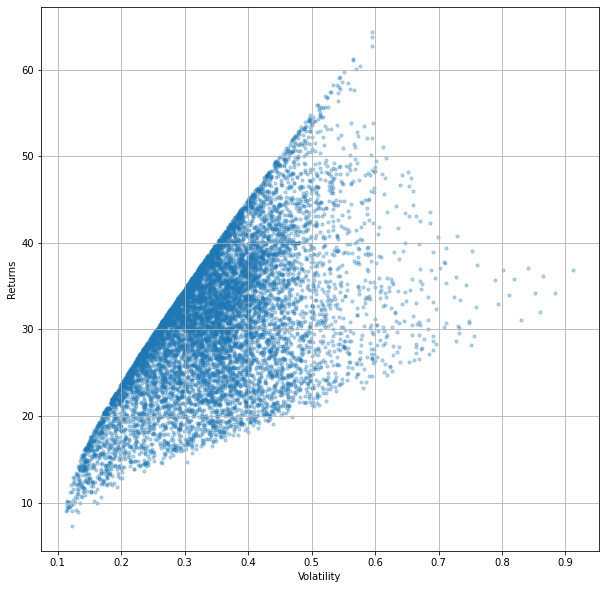

In [263]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])


# Sharpe Ratio

Las escalas preces

In [268]:
returns_df
#short term bonds: 4.28

returns_df['sharpe'] = (returns_df['returns']/100 - 0.0428)/returns_df['volatility']

returns_df

,returns,volatility,sharpe
sp_500,10.925192,0.183045,0.363035
bc,70.705249,0.675140,0.983874
au,5.898612,0.133841,0.120936
tb_1y,35.039558,0.978612,0.314318
